In [103]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

In [104]:
# Load datasets
df = pd.read_csv('/content/train.csv')

# Check basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [105]:
df.describe()


,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [106]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [107]:
# Data preprocessing
# Replace 0 with 'M' and 1 with 'F' in the gender column
df['gender'] = df['gender'].replace({0: 'M', 1: 'F'})

#Exploratory Data Analysis (EDA)

In [109]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [110]:
mean_salary = df['salary'].mean()             #Imputation
df['salary'].fillna(mean_salary, inplace=True)

In [111]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [112]:
#Dropping unnecessary columns
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)

In [113]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


#Checking for Outliers

Text(0.5, 1.0, 'Higher Secondary School Percentage')

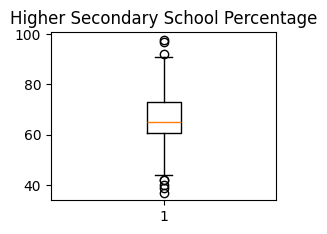

In [136]:
ax2 = plt.subplot(221)
plt.boxplot(df['hsc_p'])
ax2.set_title('Higher Secondary School Percentage')

In [114]:
# Outlier detection and removal
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 * IQR)
df_filtered = df.loc[filter]

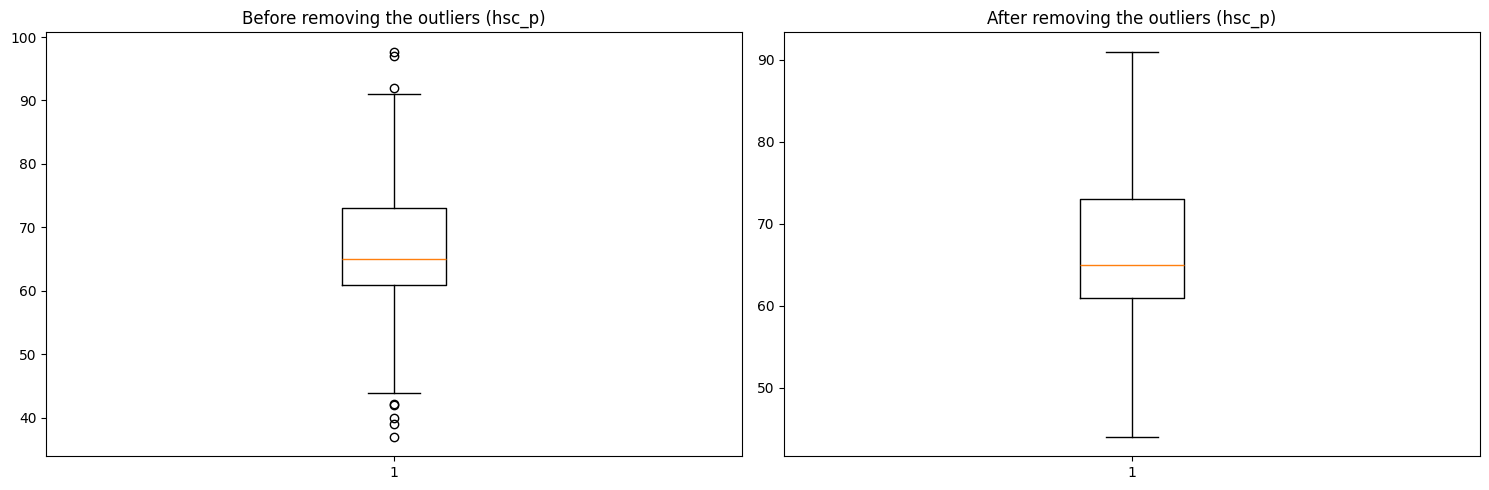

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn


# Set the seaborn style


plt.figure(figsize=(15, 5))

# Creating subplots for each boxplot
ax1 = plt.subplot(121)
plt.boxplot(df['hsc_p'])
ax1.set_title('Before removing the outliers (hsc_p)')

ax2 = plt.subplot(122)
plt.boxplot(df_filtered['hsc_p'])
ax2.set_title('After removing the outliers (hsc_p)')

plt.tight_layout()  # To adjust spacing between subplots
plt.show()  # Display the plots

# Data Visualization

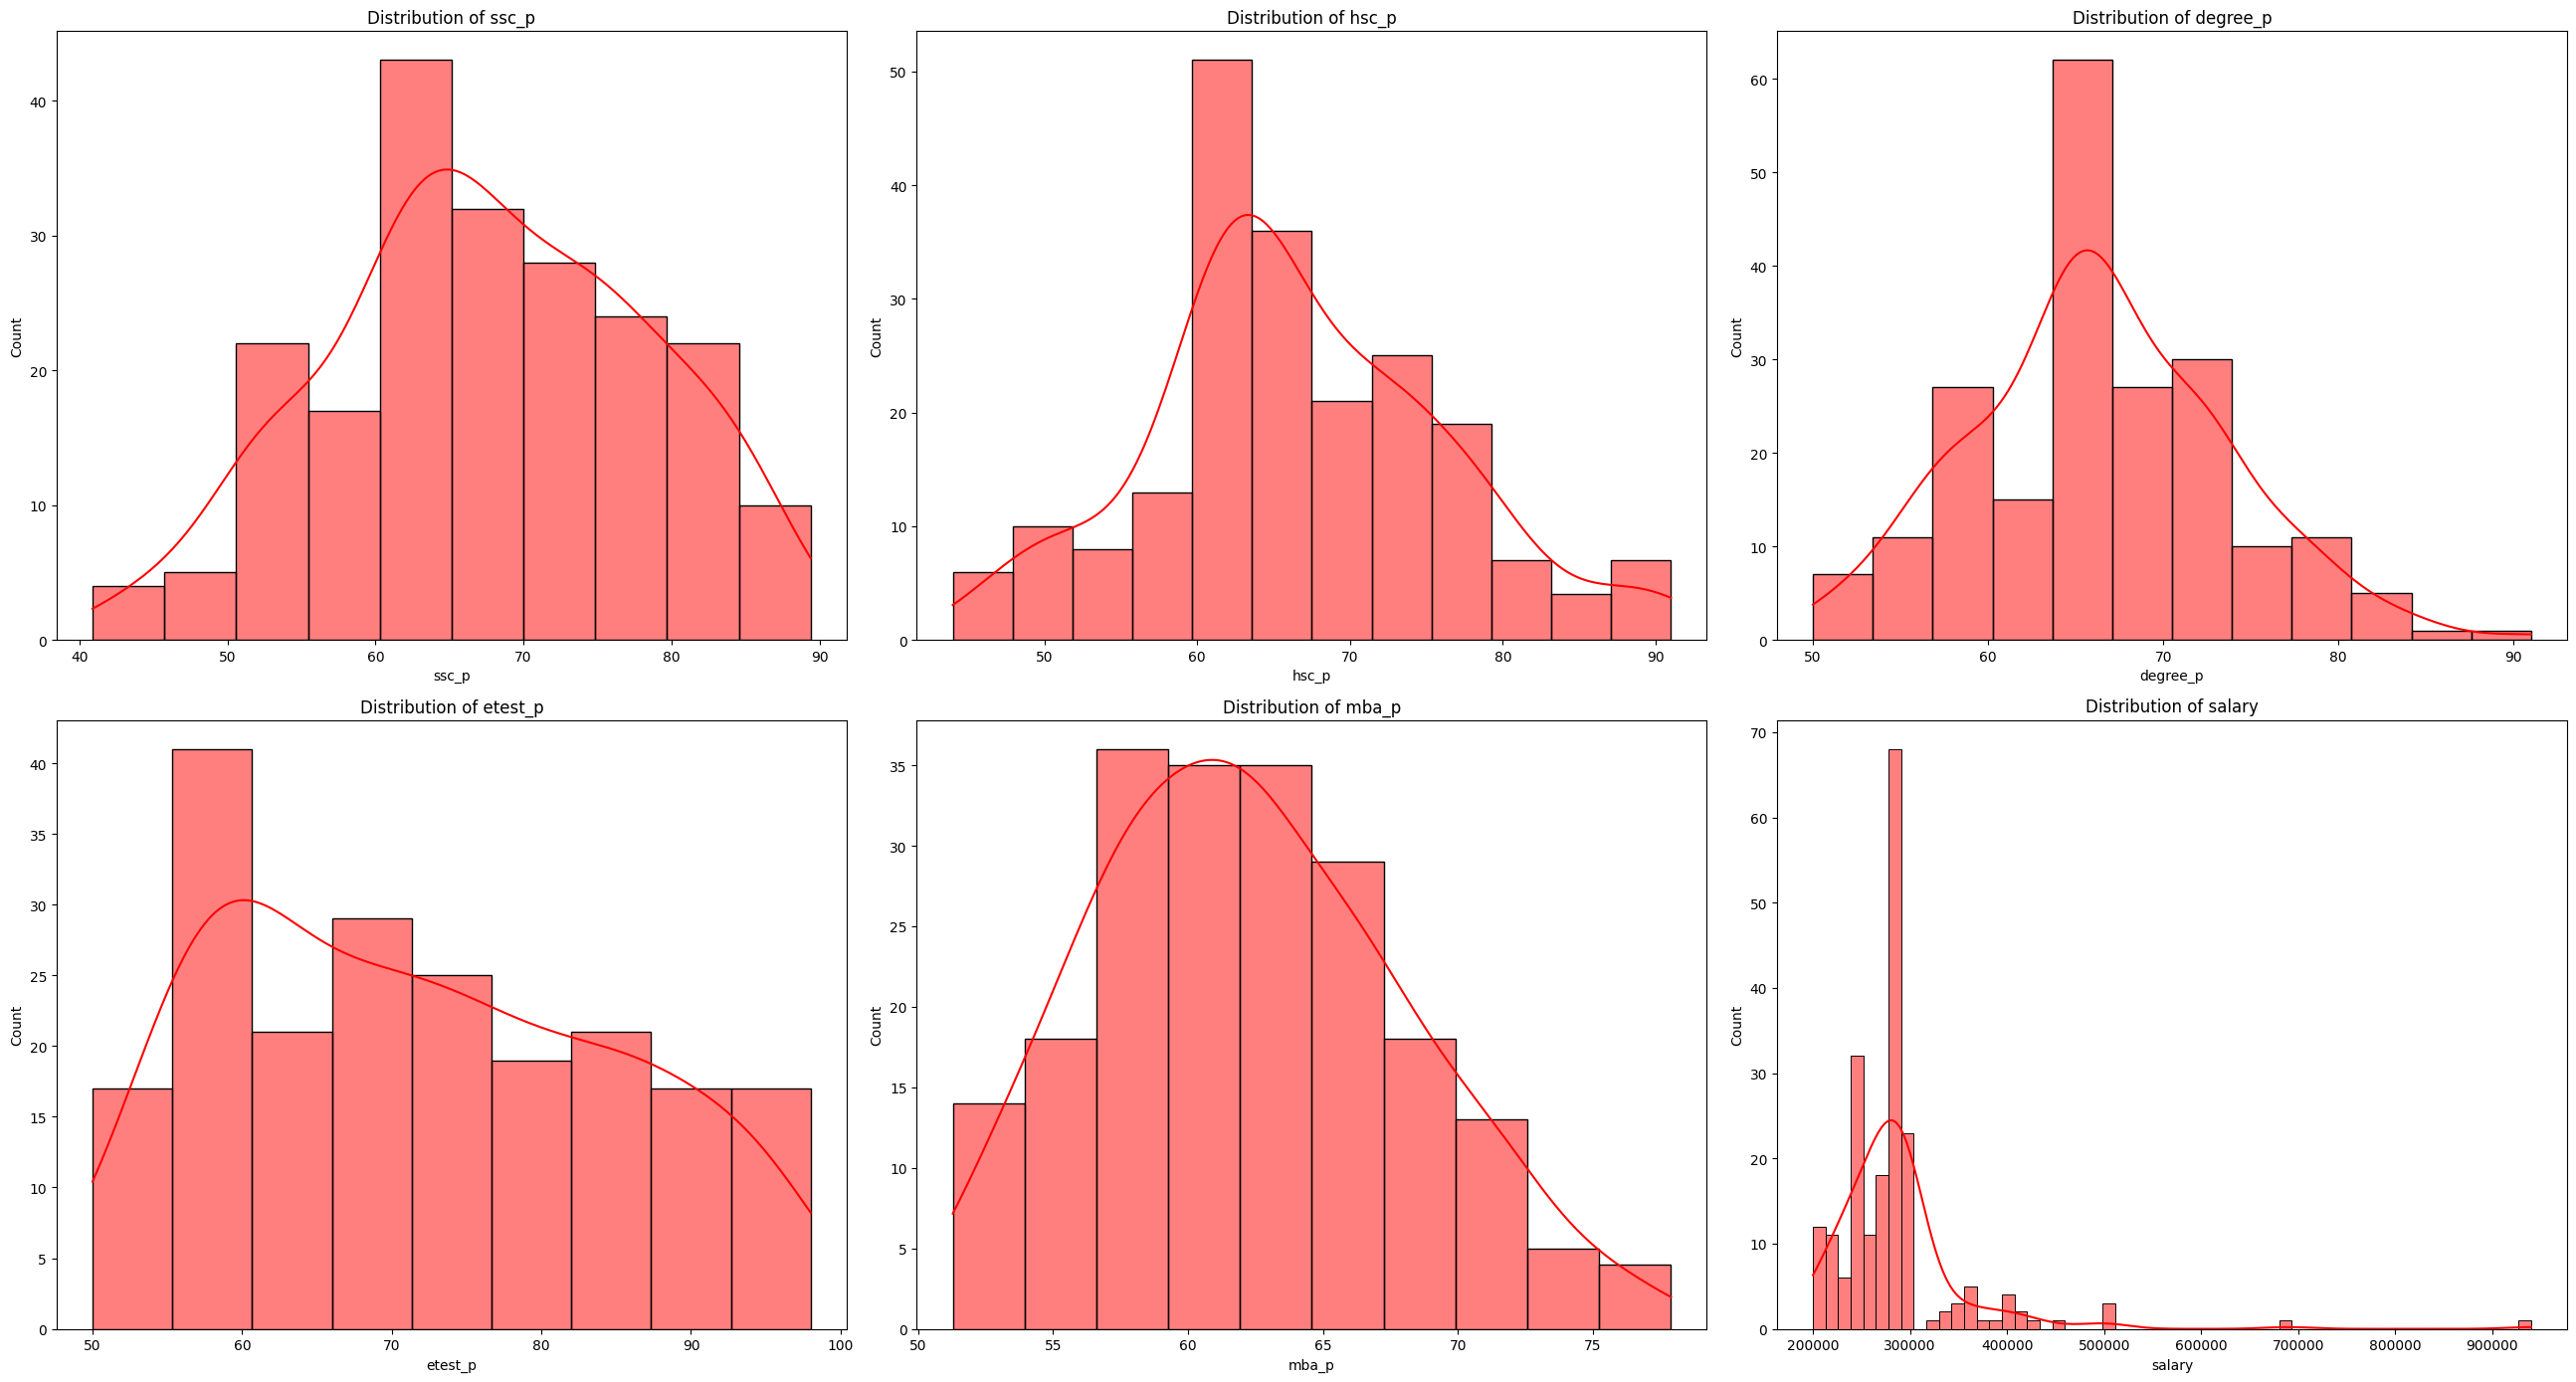

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

plt.figure(figsize=(26, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_filtered[feature], kde=True, color='red')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#Distribustion of Numeric Features

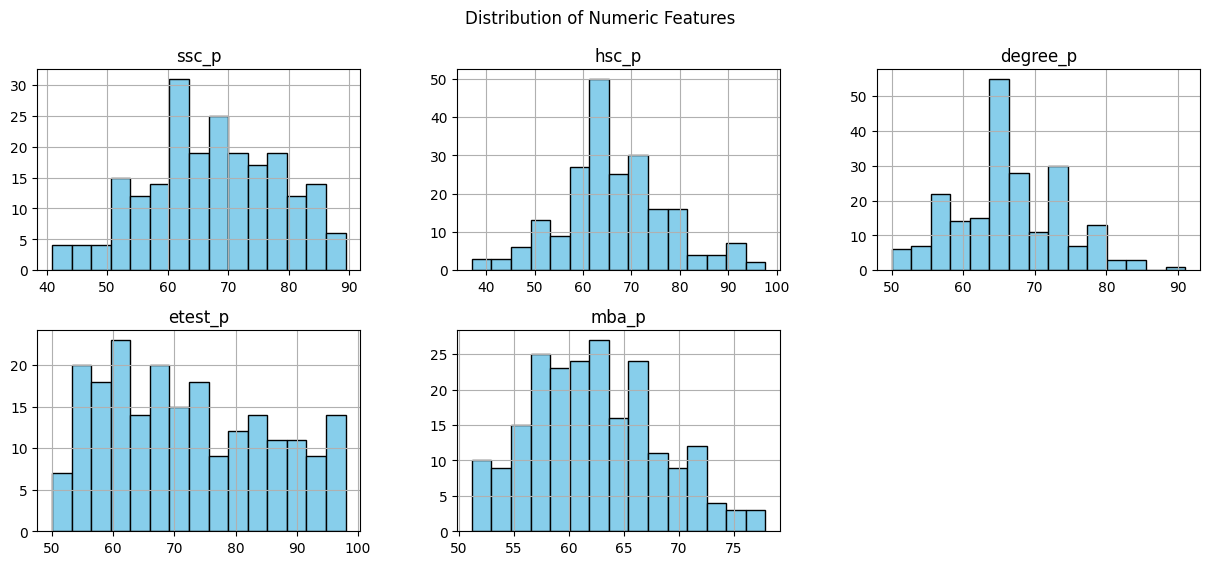

In [118]:
numeric_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
df[numeric_features].hist(bins=15, figsize=(15, 6), layout=(2, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

#Pair Plot

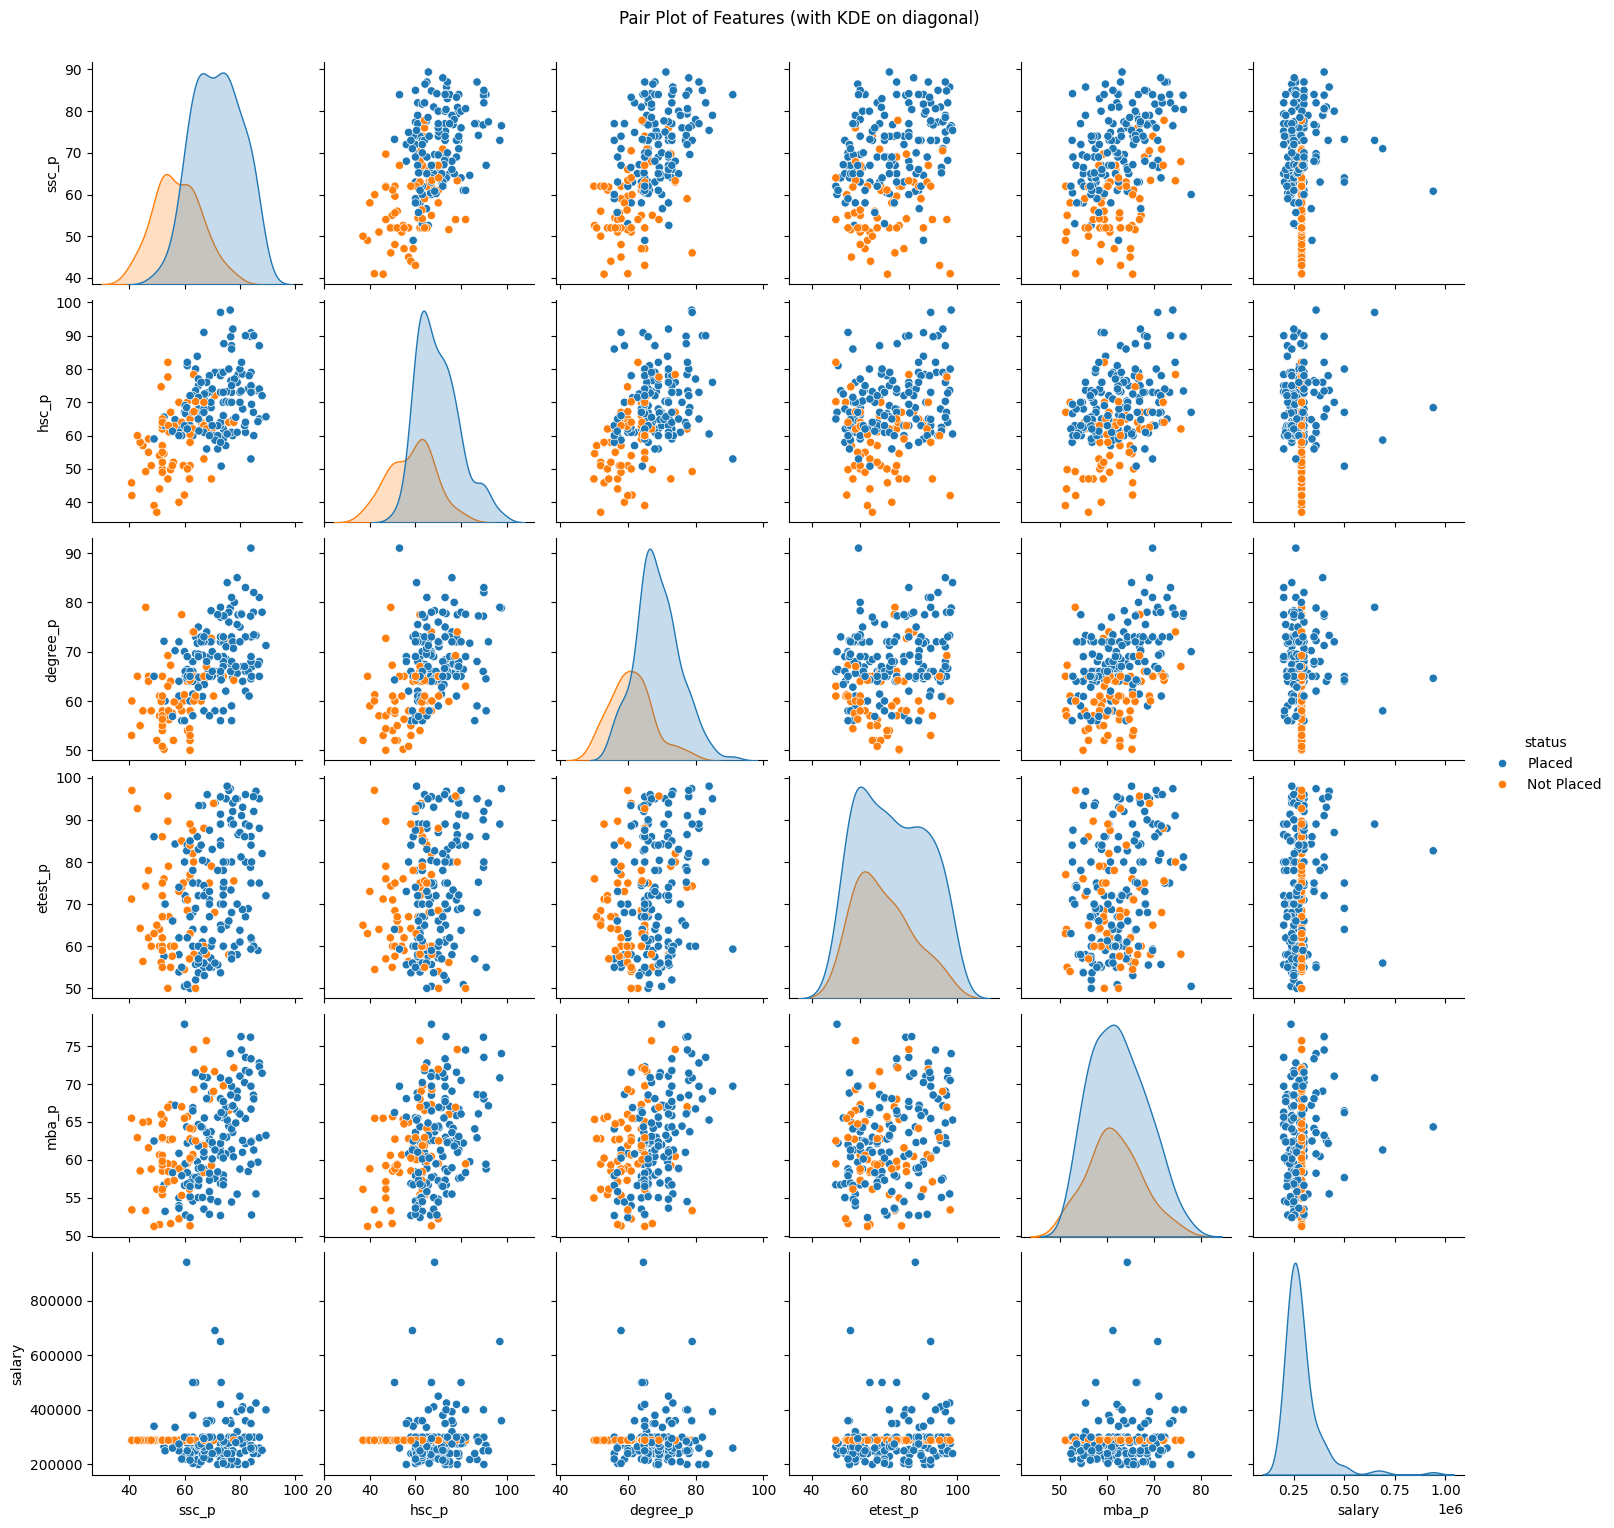

In [119]:
# Plot pair plot
sns.pairplot(df, hue='status', diag_kind='kde')
plt.suptitle('Pair Plot of Features (with KDE on diagonal)', y=1.02)
plt.show()

# Encode Categorical Variables & Correlation Matrix

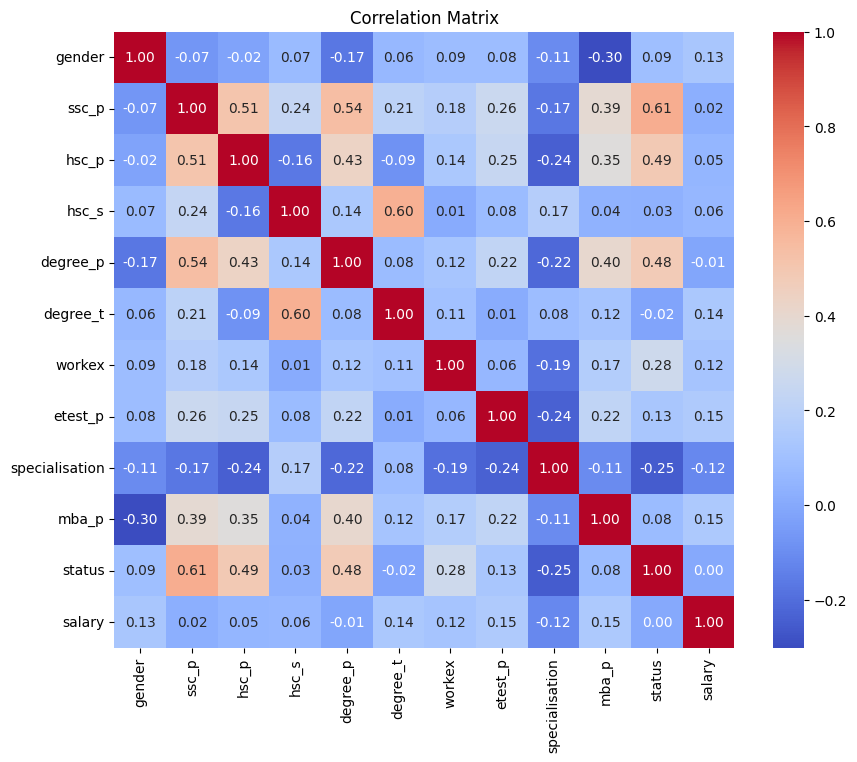

In [120]:
# Encode categorical variables
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Now compute the correlation matrix on the encoded dataframe
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Encoding  Categorical Variables and Target Variables & Splitting the Data

In [121]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data
object_cols=['gender','workex','specialisation','status']
label_encoder = LabelEncoder()
# Apply label encoder to each column with categorical data

for col in object_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
df_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.000000
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.000000
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.000000
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,288655.405405
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.000000


In [122]:
dummy_hsc_s=pd.get_dummies(df_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(df_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([df_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


In [123]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [124]:
# Load or prepare your dataset
# Assuming you have your features and target variable
X = placement_coded.drop('status', axis=1)  # Features
y = placement_coded['status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (144, 14)
Input Test: (63, 14)
Output Training: (144,)
Output Test: (63,)


#Model Selection and Training

I have chosen these below models which are:
1)Logistic Regression for baseline.

2)Random Forest Classifier for handling complex patterns.

3)Support Vector Machine (SVM) for classification.

4)K-Nearest Neighbors (KNN) and Decision Tree Classifier as additional models.

5)GaussianNB


In [126]:
# Initialize models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

In [127]:
# Train each model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

In [128]:
# Predict using the test set
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

In [129]:
# Evaluating the Models models
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Logistic Regression Accuracy: 0.7936507936507936
Random Forest Accuracy: 0.873015873015873
SVM Accuracy: 0.8412698412698413
KNN Accuracy: 0.8095238095238095
Decision Tree Accuracy: 0.8095238095238095
Naive Bayes Accuracy: 0.7936507936507936


#Voting Classifier
Combine these models into a voting classifier and evaluate its performance.

In [130]:
from sklearn.ensemble import VotingClassifier

# Define a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('dt', dt_model)], voting='hard')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')

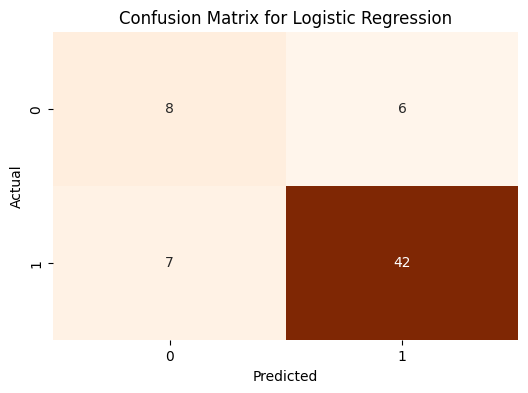

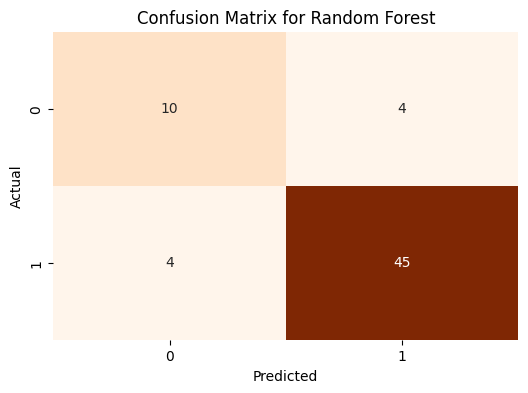

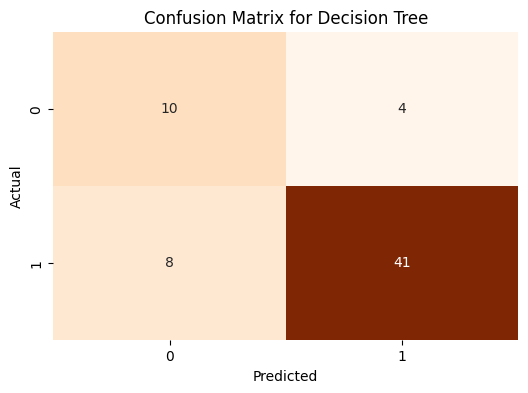

In [131]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_test, model.predict(X_test))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for Logistic Regression, Random Forest, and Decision Tree
plot_confusion_matrix(lr_model, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")
plot_confusion_matrix(dt_model, X_test, y_test, "Decision Tree")

# Assuming you have defined a Voting Classifier 'voting_clf', if not, you'll need to define it first
# plot_confusion_matrix(voting_clf, X_test, y_test, "Voting Classifier")

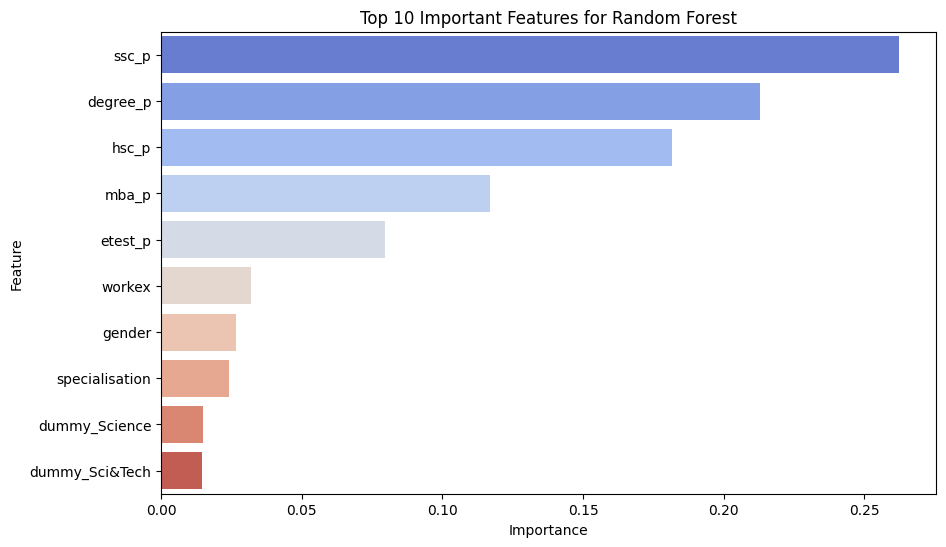

In [132]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('Top 10 Important Features for Random Forest')
plt.show()

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.793651   0.875000  0.857143  0.865979
1        Random Forest  0.873016   0.918367  0.918367  0.918367
2        Decision Tree  0.809524   0.911111  0.836735  0.872340
3    Voting Classifier  0.873016   0.918367  0.918367  0.918367


<Axes: title={'center': 'Model Performance Comparison'}, xlabel='Model'>

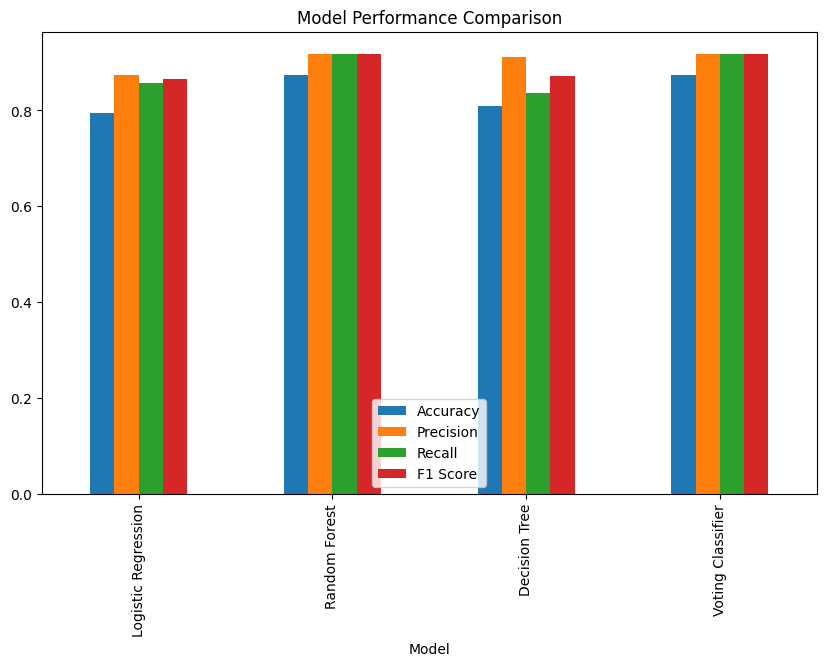

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a DataFrame to store model performance
performance_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Voting Classifier'],
    'Accuracy': [
        accuracy_score(y_test, lr_model.predict(X_test)),
        accuracy_score(y_test, rf_model.predict(X_test)),
        accuracy_score(y_test, dt_model.predict(X_test)),
        accuracy_score(y_test, voting_clf.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, lr_model.predict(X_test)),
        precision_score(y_test, rf_model.predict(X_test)),
        precision_score(y_test, dt_model.predict(X_test)),
        precision_score(y_test, voting_clf.predict(X_test))
    ],
    'Recall': [
        recall_score(y_test, lr_model.predict(X_test)),
        recall_score(y_test, rf_model.predict(X_test)),
        recall_score(y_test, dt_model.predict(X_test)),
        recall_score(y_test, voting_clf.predict(X_test))
    ],
    'F1 Score': [
        f1_score(y_test, lr_model.predict(X_test)),
        f1_score(y_test, rf_model.predict(X_test)),
        f1_score(y_test, dt_model.predict(X_test)),
        f1_score(y_test, voting_clf.predict(X_test))
    ]
}

performance_df = pd.DataFrame(performance_data)

# Display the DataFrame
print(performance_df)

# Plot the performance comparison (optional)
performance_df.plot(x='Model', kind='bar', figsize=(10, 6), title='Model Performance Comparison')
